<a href="https://colab.research.google.com/github/kostuk/WarAudioMap/blob/main/SoundMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tflite-model-maker


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 642 kB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 46.4 MB/s 
     |████████████████████████████████| 237 kB 43.9 MB/s 
     |████████████████████████████████| 840 kB 51.3 MB/s 
     |████████████████████████████████| 120 kB 50.7 MB/s 
     |████████████████████████████████| 1.1 MB 37.3 MB/s 
     |████████████████████████████████| 77 kB 6.7 MB/s 
     |████████████████████████████████| 42.6 MB 1.3 MB/s 
     |████████████████████████████████| 596 kB 44.8 MB/s 
     |████████████████████████████████| 6.4 MB 37.4 MB/s 
     |████████████████████████████████| 10.9 MB 24.0 MB/s 
     |████████████████████████████████| 87 kB 6.3 MB/s 
     |████████████████████████████████| 3.4 MB 37.2 MB/s 
     |████████████████████████████████| 25.3 MB 88.3 MB/s 
     |████████████████████████████████| 99 kB 8.8 MB/s 
     |██████████████████████████████

# New Section

In [2]:
import tensorflow as tf
import tflite_model_maker as mm
from tflite_model_maker import audio_classifier
import os
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import glob
import random

from IPython.display import Audio, Image
from scipy.io import wavfile

print(f"TensorFlow Version: {tf.__version__}")
print(f"Model Maker Version: {mm.__version__}")


from tensorflow.keras import layers
from tensorflow.keras import models


TensorFlow Version: 2.8.2
Model Maker Version: 0.4.1


In [6]:
DATASET_PATH = '/content/drive/MyDrive/soundMap'

data_dir = pathlib.Path(DATASET_PATH)

commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[ commands != 'none']
print('Commands:', commands)

filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')
print(filenames)
fcount = len(filenames)
print(fcount)


Commands: ['unknow' 'slinese' 'pushka']
['/content/drive/MyDrive/soundMap/none/001.wav', '/content/drive/MyDrive/soundMap/unknow/052.wav', '/content/drive/MyDrive/soundMap/unknow/046.wav', '/content/drive/MyDrive/soundMap/unknow/048.wav', '/content/drive/MyDrive/soundMap/unknow/045.wav', '/content/drive/MyDrive/soundMap/unknow/047.wav', '/content/drive/MyDrive/soundMap/unknow/044.wav', '/content/drive/MyDrive/soundMap/unknow/043.wav', '/content/drive/MyDrive/soundMap/unknow/051.wav', '/content/drive/MyDrive/soundMap/unknow/050.wav', '/content/drive/MyDrive/soundMap/unknow/049.wav', '/content/drive/MyDrive/soundMap/unknow/042.wav', '/content/drive/MyDrive/soundMap/unknow/041.wav', '/content/drive/MyDrive/soundMap/unknow/040.wav', '/content/drive/MyDrive/soundMap/unknow/034.wav', '/content/drive/MyDrive/soundMap/unknow/036.wav', '/content/drive/MyDrive/soundMap/unknow/037.wav', '/content/drive/MyDrive/soundMap/unknow/035.wav', '/content/drive/MyDrive/soundMap/unknow/038.wav', '/content/d

In [7]:


    
    
filenames = tf.random.shuffle(filenames)
num_samples = len(filenames)
print('Number of total examples:', num_samples)
print('Number of examples per label:',
      len(tf.io.gfile.listdir(str(data_dir/commands[0]))))
print('Example file tensor:', filenames[0])


train_files = filenames[:fcount-100]
val_files = filenames[fcount-100: fcount-50]
test_files = filenames[-50:]

print('Training set size', len(train_files))
print('Validation set size', len(val_files))
print('Test set size', len(test_files))


code_to_name = {
  'pushka': 'Pushka',
  'unknow': 'Unknow'
}





Number of total examples: 266
Number of examples per label: 78
Example file tensor: tf.Tensor(b'/content/drive/MyDrive/soundMap/pushka/043.wav', shape=(), dtype=string)
Training set size 166
Validation set size 50
Test set size 50


In [8]:
spec = audio_classifier.YamNetSpec(
    keep_yamnet_and_custom_heads=True,
    frame_step=audio_classifier.YamNetSpec.EXPECTED_WAVEFORM_LENGTH,
    frame_length=audio_classifier.YamNetSpec.EXPECTED_WAVEFORM_LENGTH//2)

INFO:tensorflow:Checkpoints are stored in /tmp/tmp3tic9vru


In [9]:
def get_label(file_path):
  parts = tf.strings.split(
      input=file_path,
      sep=os.path.sep)
  # Note: You'll use indexing here instead of tuple unpacking to enable this
  # to work in a TensorFlow graph.
  return parts[-2]

In [10]:
audio_classifier.YamNetSpec.EXPECTED_WAVEFORM_LENGTH

15600

In [11]:
train_data = audio_classifier.DataLoader.from_folder(
    spec, data_dir, cache=True)

In [12]:

train_data, validation_data = train_data.split(0.6)
test_data, validation_data = validation_data.split(0.5)


In [13]:
print(train_data.size)
print(validation_data.size)
print(test_data.size)

159
54
53


In [14]:
batch_size = 64
epochs = 100

print('Training the model')
model = audio_classifier.create(
    train_data,
    spec,
    validation_data,
    batch_size=batch_size,
    epochs=epochs)

Training the model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 classification_head (Dense)  (None, 4)                4100      
                                                                 
Total params: 4,100
Trainable params: 4,100
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 29s 3s/step - loss: 1.4905 - acc: 0.1844 - val_loss: 1.3923 - val_acc: 0.1132
Epoch 2/100
3/3 [==============================] - 0s 185ms/step - loss: 1.3243 - acc: 0.2979 - val_loss: 1.2518 - val_acc: 0.2453
Epoch 3/100
3/3 [==============================] - 0s 174ms/step - loss: 1.2145 - acc: 0.3830 - val_loss: 1.1239 - val_acc: 0.6415
Epoch 4/100
3/3 [==============================] - 0s 202ms/step - loss: 1.1205 - acc: 0.5461 - val_loss: 1.0131 - val_acc: 0.7358
Epoch 5/100
3/3 [========================

In [15]:
print('Evaluating the model')
model.evaluate(test_data)

Evaluating the model
2/2 [==============================] - 7s 2s/step - loss: 0.6235 - acc: 0.8605


[0.6235248446464539, 0.8604651093482971]

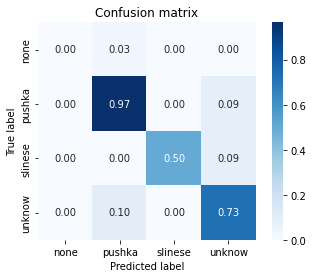

In [16]:
def show_confusion_matrix(confusion, test_labels):
  """Compute confusion matrix and normalize."""
  confusion_normalized = confusion.astype("float") / confusion.sum(axis=1)
  axis_labels = test_labels
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.2f', square=True)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

confusion_matrix = model.confusion_matrix(test_data)
show_confusion_matrix(confusion_matrix.numpy(), test_data.index_to_label)

In [17]:
serving_model = model.create_serving_model()

print(f'Model\'s input shape and type: {serving_model.inputs}')
print(f'Model\'s output shape and type: {serving_model.outputs}')

Model's input shape and type: [<KerasTensor: shape=(None, 15600) dtype=float32 (created by layer 'audio')>]
Model's output shape and type: [<KerasTensor: shape=(None, 521) dtype=float32 (created by layer 'keras_layer')>, <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'sequential')>]


In [18]:
test_files = os.path.abspath(os.path.join(DATASET_PATH, '*/*.wav'))

def get_random_audio_file():
  test_list = glob.glob(test_files)
  print(test_list)
  random_audio_path = random.choice(test_list)
  return random_audio_path


def show_sound_data(audio_path):
  sample_rate, audio_data = wavfile.read(audio_path, 'rb')

  bird_code = audio_path.split('/')[-2]
  print(f'code: {bird_code}')

  plttitle = f'{bird_code}'
  plt.title(plttitle)
  plt.plot(audio_data)
  display(Audio(audio_data, rate=sample_rate))

print('functions and data structures created')

functions and data structures created


/content/drive/MyDrive/soundMap/*/*.wav
['/content/drive/MyDrive/soundMap/none/001.wav', '/content/drive/MyDrive/soundMap/unknow/052.wav', '/content/drive/MyDrive/soundMap/unknow/046.wav', '/content/drive/MyDrive/soundMap/unknow/048.wav', '/content/drive/MyDrive/soundMap/unknow/045.wav', '/content/drive/MyDrive/soundMap/unknow/047.wav', '/content/drive/MyDrive/soundMap/unknow/044.wav', '/content/drive/MyDrive/soundMap/unknow/043.wav', '/content/drive/MyDrive/soundMap/unknow/051.wav', '/content/drive/MyDrive/soundMap/unknow/050.wav', '/content/drive/MyDrive/soundMap/unknow/049.wav', '/content/drive/MyDrive/soundMap/unknow/042.wav', '/content/drive/MyDrive/soundMap/unknow/041.wav', '/content/drive/MyDrive/soundMap/unknow/040.wav', '/content/drive/MyDrive/soundMap/unknow/034.wav', '/content/drive/MyDrive/soundMap/unknow/036.wav', '/content/drive/MyDrive/soundMap/unknow/037.wav', '/content/drive/MyDrive/soundMap/unknow/035.wav', '/content/drive/MyDrive/soundMap/unknow/038.wav', '/content/d

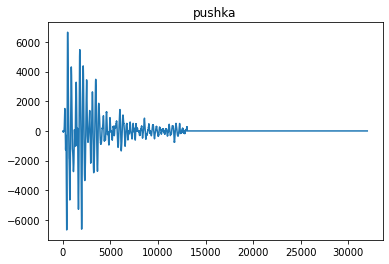

In [27]:
# if you want to try another file just uncoment the line below
print(test_files)
random_audio = get_random_audio_file()
print(random_audio)
show_sound_data(random_audio)

In [28]:
sample_rate, audio_data = wavfile.read(random_audio, 'rb')

audio_data = np.array(audio_data) / tf.int16.max
input_size = serving_model.input_shape[1]

splitted_audio_data = tf.signal.frame(audio_data, input_size, input_size, pad_end=True, pad_value=0)

print(f'Test audio path: {random_audio}')
print(f'Original size of the audio data: {len(audio_data)}')
print(f'Number of windows for inference: {len(splitted_audio_data)}')

Test audio path: /content/drive/MyDrive/soundMap/pushka/149.wav
Original size of the audio data: 32000
Number of windows for inference: 3


In [29]:
print(random_audio)

results = []
print('Result of the window ith:  your model class -> score,  (spec class -> score)')
for i, data in enumerate(splitted_audio_data):
  yamnet_output, inference = serving_model(data)
  results.append(inference[0].numpy())
  result_index = tf.argmax(inference[0])
  spec_result_index = tf.argmax(yamnet_output[0])
  t = spec._yamnet_labels()[spec_result_index]
  result_str = f'Result of the window {i} {spec_result_index}: ' \
  f'\t{test_data.index_to_label[result_index]} -> {inference[0][result_index].numpy():.3f}, ' \
  f'\t({spec._yamnet_labels()[spec_result_index]} -> {yamnet_output[0][spec_result_index]:.3f})'
  print(result_str)


results_np = np.array(results)
mean_results = results_np.mean(axis=0)
result_index = mean_results.argmax()
print(f'Mean result: {test_data.index_to_label[result_index]} -> {mean_results[result_index]}')

/content/drive/MyDrive/soundMap/pushka/149.wav
Result of the window ith:  your model class -> score,  (spec class -> score)
Result of the window 0 494: 	pushka -> 0.870, 	(Silence -> 0.182)
Result of the window 1 494: 	unknow -> 1.000, 	(Silence -> 1.000)
Result of the window 2 494: 	unknow -> 1.000, 	(Silence -> 1.000)
Mean result: unknow -> 0.7032931447029114


In [30]:
models_path = './pushki_models'
print(f'Exporing the TFLite model to {models_path}')

model.export(models_path, tflite_filename='pushki_model.tflite')

Exporing the TFLite model to ./pushki_models
INFO:tensorflow:Assets written to: /tmp/tmpk7_kuuvh/assets


INFO:tensorflow:Assets written to: /tmp/tmpk7_kuuvh/assets


INFO:tensorflow:TensorFlow Lite model exported successfully: ./pushki_models/pushki_model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./pushki_models/pushki_model.tflite
